In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [18]:
# True locations.
pred_locs = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/localize/synthetic_data100/localized.tsv', sep='\t', header=None, comment='#')
pred_locs=pred_locs[[i for i in range(18)]]
pred_locs.columns = ['chrom_pred1', 'start_pred1', 'end_pred1', 
                            'chrom_pred5', 'start_pred5', 'end_pred5',
                            'chrom_pred10', 'start_pred10', 'end_pred10',
                            'chrom_pred25', 'start_pred25', 'end_pred25',
                            'chrom_pred50', 'start_pred50', 'end_pred50',
                            'chrom_pred100', 'start_pred100', 'end_pred100']

# True locations.
true_locs = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/data/counts/synthetic_data_locations_all.txt', header=None)
true_locs['chrom'] = true_locs[0].apply(lambda x: x.split('.')[0])
true_locs['start'] = true_locs[0].apply(lambda x: int(x.split('.')[1]))
true_locs['end'] = true_locs[0].apply(lambda x: int(x.split('.')[2]))
true_locs['prev'] = true_locs[1]
true_locs = true_locs[['chrom', 'start', 'end', 'prev']]
for col in pred_locs.columns:
    if 'chrom' in col:
        pred_locs[col] = [str(int(c)) if not pd.isna(c) else 'NaN' for c in pred_locs[col]]
        pred_locs[col] = pred_locs[col].replace('23', 'XX')
        pred_locs[col] = pred_locs[col].replace('24', 'YY')
true_locs.chrom = [c[1:] if c[0]=='0' else c for c in true_locs.chrom ]


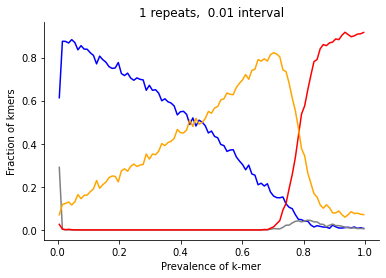

120647.0 0.9933495981274846 0.5225158957735944


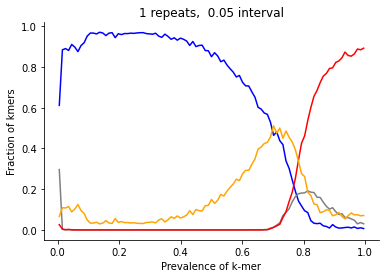

405203.0 0.9831944220837926 0.813326615442751


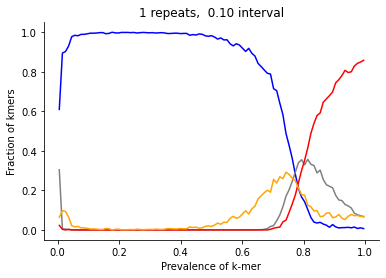

806720.0 0.971491200911489 0.9209637325514691


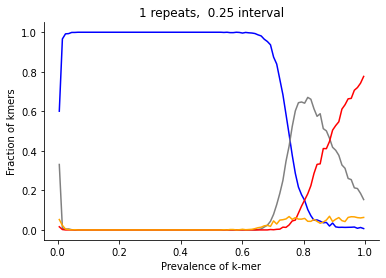

2087012.5 0.9450753588368608 0.985074431282105


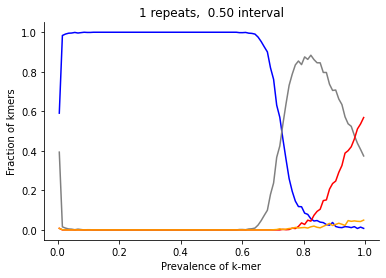

4246077.0 0.908578646884714 0.9978600149935255


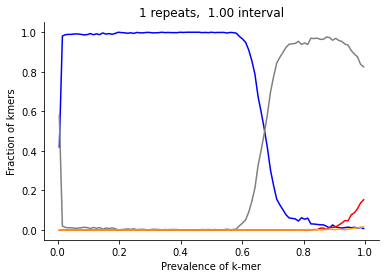

8855857.5 0.8354613793701314 0.9999555298616979


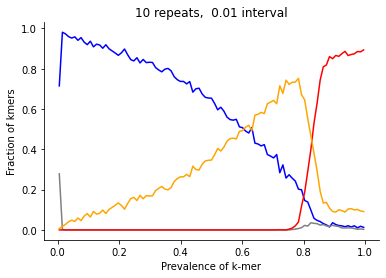

100239.0 0.9961608480810432 0.6846973407760111


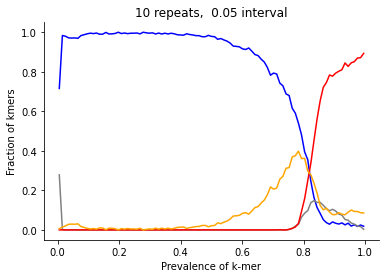

353781.5 0.9947985683678651 0.9296998518555405


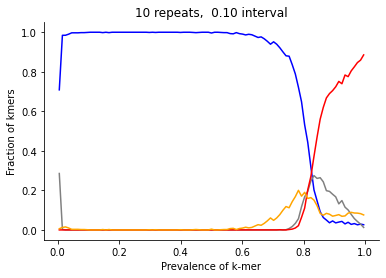

704285.5 0.9932009857951379 0.9784782662909299


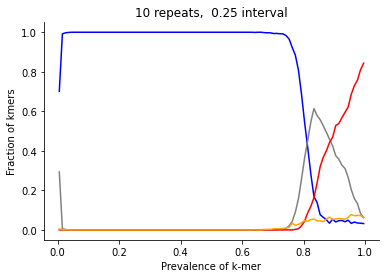

1788037.0 0.9883091631887253 0.9971304336929689


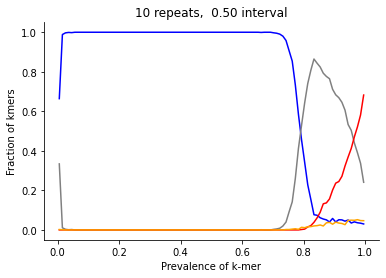

3693680.0 0.9753303528304457 0.9995047933464541


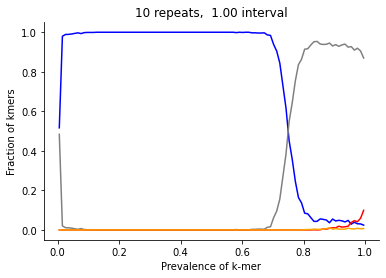

7826941.0 0.9326662290859103 1.0


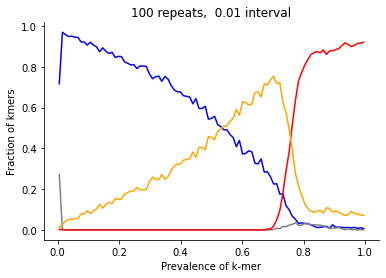

110482.0 0.9942908095656805 0.6136561791595048


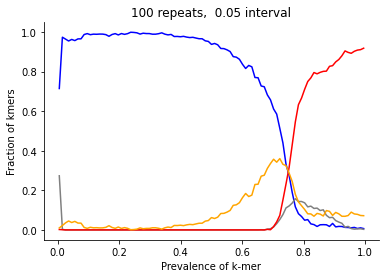

374324.0 0.9837641026911217 0.8704743441260889


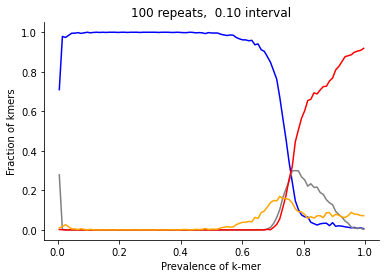

738530.0 0.9708967515821021 0.9358904039695396


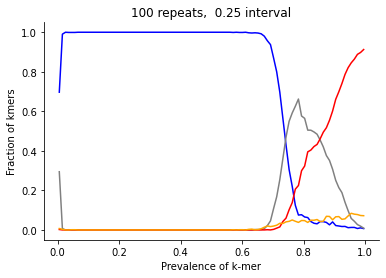

1873684.0 0.9393166309584257 0.9783511542974672


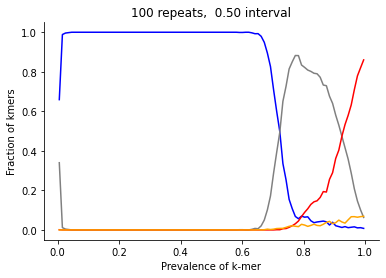

3828920.0 0.9036249024731569 0.9949976015898033


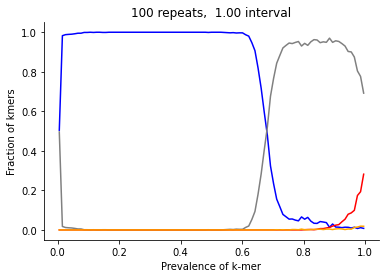

8099494.0 0.8482668086740065 0.9998394043360829


In [20]:
for n_repeats in [1,10,100]:
    pred_locs = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/localize/synthetic_data%i/localized.tsv' % n_repeats, sep='\t', header=None, comment='#')
    pred_locs=pred_locs[[i for i in range(18)]]
    pred_locs.columns = ['chrom_pred1', 'start_pred1', 'end_pred1', 
                                'chrom_pred5', 'start_pred5', 'end_pred5',
                                'chrom_pred10', 'start_pred10', 'end_pred10',
                                'chrom_pred25', 'start_pred25', 'end_pred25',
                                'chrom_pred50', 'start_pred50', 'end_pred50',
                                'chrom_pred100', 'start_pred100', 'end_pred100']
    for col in pred_locs.columns:
        if 'chrom' in col:
            pred_locs[col] = [str(int(c)) if not pd.isna(c) else 'NaN' for c in pred_locs[col]]
            pred_locs[col] = pred_locs[col].replace('23', 'XX')
            pred_locs[col] = pred_locs[col].replace('24', 'YY')
    
    for i in [1,5,10,25,50,100]:
        bins = np.linspace(0,1, 100)
        freq_correct, _ = np.histogram(true_locs[(
            (pred_locs['chrom_pred%s' % str(i)]==true_locs['chrom']) & 
            (pred_locs['start_pred%s' % str(i)] <= true_locs.end) & 
            (pred_locs['end_pred%s' % str(i)] >= true_locs.start))].prev, bins=bins)
        freq, _ = np.histogram(true_locs.prev, bins=bins)

        freq_nan, _ = np.histogram(true_locs[
            (pred_locs['chrom_pred%s' % str(i)]=='NaN')].prev, bins=bins)
        freq_not_nan, _ = np.histogram(true_locs[
            (pred_locs['chrom_pred%s' % str(i)]=='NaN')].prev, bins=bins)
        freq_wrong_chrom, _ = np.histogram(true_locs[(
            pred_locs['chrom_pred%s' % str(i)]!=true_locs['chrom'])].prev, bins=bins)
        freq_wrong_chrom = freq_wrong_chrom - freq_nan
        freq_wrong_id = freq - freq_nan - freq_correct - freq_wrong_chrom
        f,ax = plt.subplots()
        ax.plot((bins[1:]+bins[:-1])/2, freq_correct/freq, label='correct region', color='blue')
        ax.plot((bins[1:]+bins[:-1])/2, freq_nan/freq, label='unable to localize', color='grey')
        ax.plot((bins[1:]+bins[:-1])/2, freq_wrong_chrom/freq, label='incorrect chromsome', color='red')
        ax.plot((bins[1:]+bins[:-1])/2, freq_wrong_id/freq, label='right chromomsome, incorrect region', color='orange')
        #plt.legend()
        ax.set_ylabel('Fraction of kmers')
        ax.set_xlabel('Prevalence of k-mer')
        ax.set_title('%i repeats,  %.02f interval' % (n_repeats,i/100))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        #plt.savefig('/home/groups/dpwall/briannac/alt_haplotypes/results/figures/synthetic/performance_%irepeats_%.02f_interval.svg' % (
        #    n_repeats,i/100), transparent=True)
        plt.show()
        correct_locs_pred = pred_locs[(
            (pred_locs['chrom_pred%s' % str(i)]==true_locs['chrom']) & 
            (pred_locs['start_pred%s' % str(i)] <= true_locs.end) & 
            (pred_locs['end_pred%s' % str(i)] >= true_locs.start))]
        print(np.median((correct_locs_pred['end_pred%s'%i]-correct_locs_pred['start_pred%s'%i])),
             len(true_locs[(true_locs.prev<.8) &
                           (pred_locs['chrom_pred%s' % str(i)]!='NaN')])/sum(true_locs.prev<.8),
             len(true_locs[(true_locs.prev<.8) &
            (pred_locs['chrom_pred%s' % str(i)]==true_locs['chrom']) & 
            (pred_locs['start_pred%s' % str(i)] <= true_locs.end) & 
            (pred_locs['end_pred%s' % str(i)] >= true_locs.start)])/sum((true_locs.prev<.8) & (pred_locs['chrom_pred%s' % str(i)]!='NaN')))

        

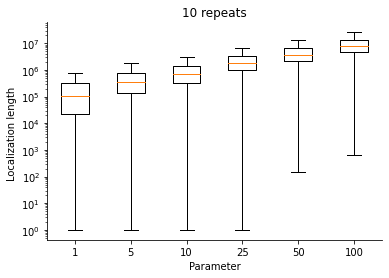

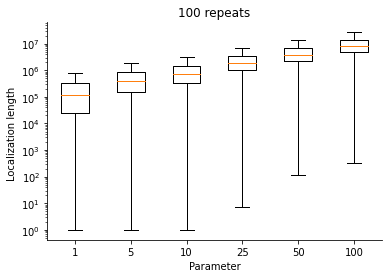

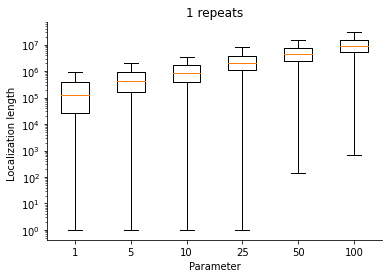

In [21]:
for n_repeats in [10,100,1]:
    pred_locs = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/localize/synthetic_data%i/localized.tsv' % n_repeats, sep='\t', header=None, skiprows=1, comment='#')
    pred_locs=pred_locs[[i for i in range(18)]]
    pred_locs.columns = ['chrom_pred1', 'start_pred1', 'end_pred1', 
                                'chrom_pred5', 'start_pred5', 'end_pred5',
                                'chrom_pred10', 'start_pred10', 'end_pred10',
                                'chrom_pred25', 'start_pred25', 'end_pred25',
                                'chrom_pred50', 'start_pred50', 'end_pred50',
                                'chrom_pred100', 'start_pred100', 'end_pred100']
    region_length = dict()
    for col in pred_locs.columns:
        if 'chrom' in col:
            pred_locs[col] = [str(int(c)) if not pd.isna(c) else 'NaN' for c in pred_locs[col]]
            pred_locs[col] = pred_locs[col].replace('23', 'XX')
            pred_locs[col] = pred_locs[col].replace('24', 'YY')
    
    for i in [1,5,10,25,50,100]:
        bins = np.linspace(0,1, 100)
        pred_locs_correct = pred_locs[(pred_locs['chrom_pred%s' % str(i)]==true_locs['chrom']) & 
            (pred_locs['start_pred%s' % str(i)] <= true_locs.end) & 
            (pred_locs['end_pred%s' % str(i)] >= true_locs.start)]
        region_length[i] = pred_locs_correct['end_pred%s' % str(i)]-pred_locs_correct['start_pred%s' % str(i)]

        
        
    f,ax = plt.subplots()
    #plt.legend()
    vals = [[v for v in region_length[k] if v!=100] for k in region_length.keys()]
    plt.boxplot(vals, showfliers=False, labels=region_length.keys())
    ax.set_ylabel('Localization length ')
    ax.set_xlabel('Parameter')
    ax.set_title('%i repeats' % (n_repeats))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yscale('log')
    plt.savefig('/home/groups/dpwall/briannac/alt_haplotypes/results/figures/synthetic/regionlength_%irepeats.svg' % (
        n_repeats), transparent=True)
    plt.show()

In [22]:
pred_locs_all = pd.DataFrame()
true_locs_all = pd.DataFrame()
for n_repeats in [10,100,1]:
    pred_locs = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/localize/synthetic_data%i/localized.tsv' % n_repeats, sep='\t', header=None, skiprows=1, comment='#')
    pred_locs=pred_locs[[i for i in range(18)]]
    pred_locs.columns = ['chrom_pred1', 'start_pred1', 'end_pred1', 
                                'chrom_pred5', 'start_pred5', 'end_pred5',
                                'chrom_pred10', 'start_pred10', 'end_pred10',
                                'chrom_pred25', 'start_pred25', 'end_pred25',
                                'chrom_pred50', 'start_pred50', 'end_pred50',
                                'chrom_pred100', 'start_pred100', 'end_pred100']
    region_length = dict()
    for col in pred_locs.columns:
        if 'chrom' in col:
            pred_locs[col] = [str(int(c)) if not pd.isna(c) else 'NaN' for c in pred_locs[col]]
            pred_locs[col] = pred_locs[col].replace('23', 'XX')
            pred_locs[col] = pred_locs[col].replace('24', 'YY')
    true_locs_all = pd.concat([true_locs_all, true_locs])
    pred_locs_all = pd.concat([pred_locs_all, pred_locs])

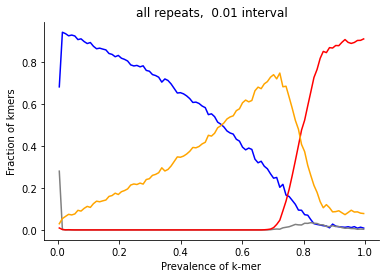

108981.0 0.9946004185914028 0.607031830425886


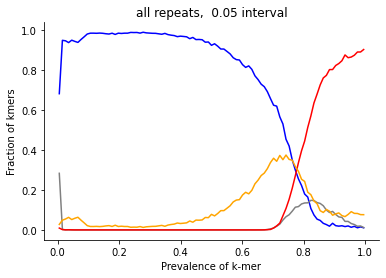

375863.0 0.9872523643809265 0.871396135528302


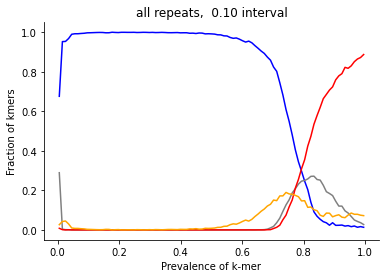

745571.0 0.978529646096243 0.9453594330070874


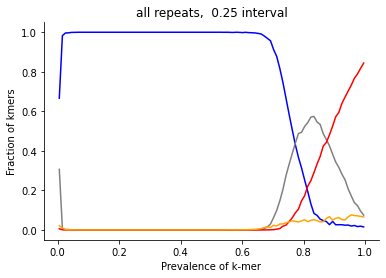

1909041.0 0.9575670509946705 0.9870237366465197


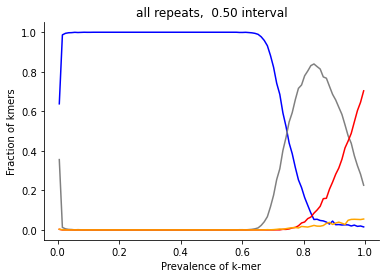

3907772.5 0.9291779673961056 0.9975076082368883


In [ ]:
    for i in [1,5,10,25,50,100]:
        pred_locs = pred_locs_all
        true_locs = true_locs_all

        bins = np.linspace(0,1, 100)
        freq_correct, _ = np.histogram(true_locs[(
            (pred_locs['chrom_pred%s' % str(i)]==true_locs['chrom']) & 
            (pred_locs['start_pred%s' % str(i)] <= true_locs.end) & 
            (pred_locs['end_pred%s' % str(i)] >= true_locs.start))].prev, bins=bins)
        freq, _ = np.histogram(true_locs.prev, bins=bins)

        freq_nan, _ = np.histogram(true_locs[
            (pred_locs['chrom_pred%s' % str(i)]=='NaN')].prev, bins=bins)
        freq_not_nan, _ = np.histogram(true_locs[
            (pred_locs['chrom_pred%s' % str(i)]=='NaN')].prev, bins=bins)
        freq_wrong_chrom, _ = np.histogram(true_locs[(
            pred_locs['chrom_pred%s' % str(i)]!=true_locs['chrom'])].prev, bins=bins)
        freq_wrong_chrom = freq_wrong_chrom - freq_nan
        freq_wrong_id = freq - freq_nan - freq_correct - freq_wrong_chrom
        f,ax = plt.subplots()
        ax.plot((bins[1:]+bins[:-1])/2, freq_correct/freq, label='correct region', color='blue')
        ax.plot((bins[1:]+bins[:-1])/2, freq_nan/freq, label='unable to localize', color='grey')
        ax.plot((bins[1:]+bins[:-1])/2, freq_wrong_chrom/freq, label='incorrect chromsome', color='red')
        ax.plot((bins[1:]+bins[:-1])/2, freq_wrong_id/freq, label='right chromomsome, incorrect region', color='orange')
        #plt.legend()
        ax.set_ylabel('Fraction of kmers')
        ax.set_xlabel('Prevalence of k-mer')
        ax.set_title('all repeats,  %.02f interval' % (i/100))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig('/home/groups/dpwall/briannac/alt_haplotypes/results/figures/synthetic/performance_allrepeats_%.02f_interval.svg' % (
            i/100), transparent=True)
        plt.show()
        correct_locs_pred = pred_locs[(
            (pred_locs['chrom_pred%s' % str(i)]==true_locs['chrom']) & 
            (pred_locs['start_pred%s' % str(i)] <= true_locs.end) & 
            (pred_locs['end_pred%s' % str(i)] >= true_locs.start))]
        print(np.median((correct_locs_pred['end_pred%s'%i]-correct_locs_pred['start_pred%s'%i])),
             len(true_locs[(true_locs.prev<.8) &
            (pred_locs['chrom_pred%s' % str(i)]!='NaN')])/sum(true_locs.prev<.8),
             len(true_locs[(true_locs.prev<.8) &
            (pred_locs['chrom_pred%s' % str(i)]==true_locs['chrom']) & 
            (pred_locs['start_pred%s' % str(i)] <= true_locs.end) & 
            (pred_locs['end_pred%s' % str(i)] >= true_locs.start)])/sum((true_locs.prev<.8) & (pred_locs['chrom_pred%s' % str(i)]!='NaN')))

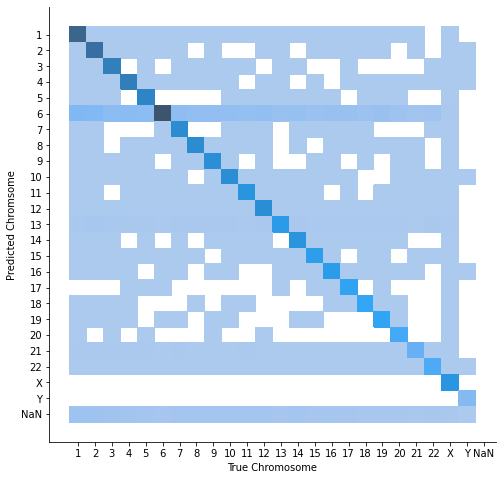

In [11]:
pred_locs['chrom_pred10'] = [str(i).replace('XX', 'X').replace('YY', 'Y') for i in pred_locs['chrom_pred10']]
pred_locs['chrom_pred10'] = pd.Categorical(pred_locs['chrom_pred10'], categories=[str(i) for i in range(1,23)] + ['X', 'Y', 'NaN'], ordered=True)
true_locs['chrom'] = [str(i).replace('XX', 'X').replace('YY', 'Y') for i in true_locs['chrom']]
true_locs['chrom'] = pd.Categorical(true_locs['chrom'], categories=[str(i) for i in range(1,23)] + ['X', 'Y', 'NaN'], ordered=True)

f,ax = plt.subplots(figsize=(8,8))
sns.histplot(y=pred_locs['chrom_pred10'], x=true_locs['chrom'], ax=ax)
ax.set_ylabel('Predicted Chromsome')
ax.set_xlabel('True Chromosome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('/home/groups/dpwall/briannac/alt_haplotypes/results/figures/synthetic/chrom_confusion.svg', transparent=True)
plt.show()